In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

# 4 Evaluation Metrics for Classification

## 4.1 Evaluation Metrics: Overview

In [2]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(url)

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [3]:
# Slitting the data
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Storing target variables
y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

# Remove target from each df
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [4]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [5]:
# Initialize Model
dv = DictVectorizer(sparse=False)

dict_train = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(dict_train)

# Train model on training set
model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [152]:
# Comparinng Model to validation-set
dict_val = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(dict_val)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.801277501774308)

## 4.2 Accuracy & Dummy model
- Evaluate the model using different thresholds
- Check accuracy of dummy baselines

In [10]:
len(y_val)

1409

In [ ]:
# Total amount of correct predictions
(y_val == churn_decision).sum()

np.int64(1129)

In [13]:
1129/1409

0.801277501774308

In [23]:
np.linspace(0,10,11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [96]:
from sklearn.metrics import accuracy_score

In [101]:
accuracy_score(y_val, y_pred >= 0.5)

0.801277501774308

In [136]:
# Testing different thresholds
thresholds = np.linspace(0,1,21)

scores = []

for t in thresholds:
    score = accuracy_score(y_true=y_val, y_pred=y_pred >= t)
    print('%.2f %.3f'%(t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.598
0.15 0.664
0.20 0.707
0.25 0.737
0.30 0.759
0.35 0.766
0.40 0.780
0.45 0.793
0.50 0.801
0.55 0.798
0.60 0.797
0.65 0.784
0.70 0.765
0.75 0.744
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


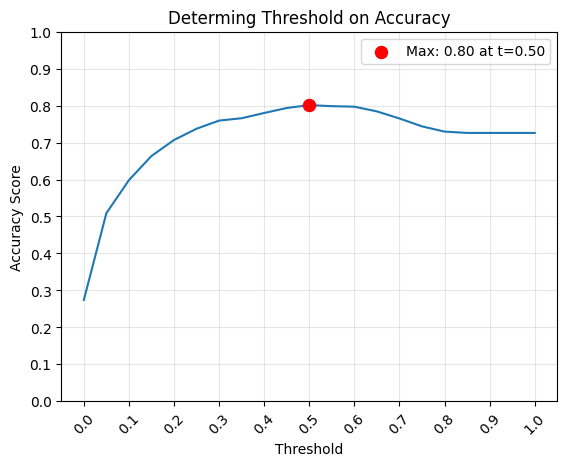

In [156]:
#Initial Plot
plt.plot(thresholds,scores)

# Finding the maximum score
max_score = max(scores)
max_threshold = thresholds[scores.index(max_score)]

# Add dot to the highest point
plt.scatter(
    x=max_threshold, 
    y=max_score,
    color='red', 
    s=75,
    zorder=5,
    label=f'Max: {max_score:.2f} at t={max_threshold:.2f}')

plt.xlabel('Threshold')
plt.ylabel('Accuracy Score')
plt.title('Determing Threshold on Accuracy')
plt.xticks(np.arange(0,1.1,0.1),rotation=45)
plt.yticks(np.arange(0,1.1,0.1))
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [116]:
from collections import Counter

In [157]:
# No values have a prediction score >= 1
Counter(y_pred >= .5)

Counter({np.False_: 1087, np.True_: 322})

In [158]:
Counter(y_val)

Counter({np.int64(0): 1023, np.int64(1): 386})

In [168]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [ ]:
# look into class imbalance